# binary calssification for cancer dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import tensorflow.keras

In [3]:
from keras.models import Sequential

In [5]:
from keras.layers import Dense

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer = load_breast_cancer()

In [10]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))


In [11]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
X = df_cancer.iloc[:,[0,1]]
y = df_cancer["target"]

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='mean radius', ylabel='mean texture'>

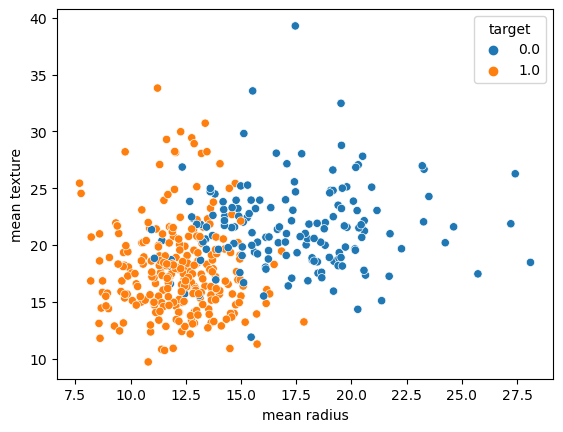

In [16]:
sns.scatterplot(x=X_train["mean radius"], y=X_train["mean texture"], hue = y_train)

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train_scaled = scaler.transform(X_train)

In [21]:
scaler.fit(X_test)

MinMaxScaler()

In [22]:
X_test_scaled = scaler.transform(X_test)

<Axes: >

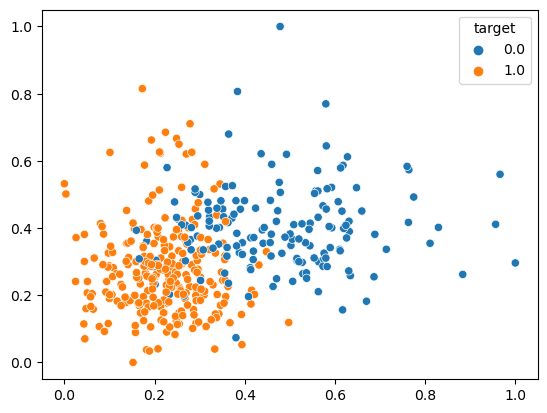

In [25]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train)

## build network

In [27]:
model = Sequential()

In [28]:
model.add(Dense(20, input_dim=2, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(X_train_scaled, y_train, epochs=200, verbose=2)

Epoch 1/200
14/14 - 1s - loss: 0.6974 - 748ms/epoch - 53ms/step
Epoch 2/200
14/14 - 0s - loss: 0.6868 - 35ms/epoch - 3ms/step
Epoch 3/200
14/14 - 0s - loss: 0.6770 - 32ms/epoch - 2ms/step
Epoch 4/200
14/14 - 0s - loss: 0.6680 - 29ms/epoch - 2ms/step
Epoch 5/200
14/14 - 0s - loss: 0.6584 - 87ms/epoch - 6ms/step
Epoch 6/200
14/14 - 0s - loss: 0.6483 - 53ms/epoch - 4ms/step
Epoch 7/200
14/14 - 0s - loss: 0.6371 - 42ms/epoch - 3ms/step
Epoch 8/200
14/14 - 0s - loss: 0.6237 - 83ms/epoch - 6ms/step
Epoch 9/200
14/14 - 0s - loss: 0.6098 - 47ms/epoch - 3ms/step
Epoch 10/200
14/14 - 0s - loss: 0.5943 - 49ms/epoch - 3ms/step
Epoch 11/200
14/14 - 0s - loss: 0.5770 - 43ms/epoch - 3ms/step
Epoch 12/200
14/14 - 0s - loss: 0.5587 - 43ms/epoch - 3ms/step
Epoch 13/200
14/14 - 0s - loss: 0.5386 - 47ms/epoch - 3ms/step
Epoch 14/200
14/14 - 0s - loss: 0.5169 - 38ms/epoch - 3ms/step
Epoch 15/200
14/14 - 0s - loss: 0.4962 - 46ms/epoch - 3ms/step
Epoch 16/200
14/14 - 0s - loss: 0.4747 - 51ms/epoch - 4ms/step

Epoch 131/200
14/14 - 0s - loss: 0.2568 - 38ms/epoch - 3ms/step
Epoch 132/200
14/14 - 0s - loss: 0.2542 - 23ms/epoch - 2ms/step
Epoch 133/200
14/14 - 0s - loss: 0.2574 - 31ms/epoch - 2ms/step
Epoch 134/200
14/14 - 0s - loss: 0.2549 - 40ms/epoch - 3ms/step
Epoch 135/200
14/14 - 0s - loss: 0.2553 - 29ms/epoch - 2ms/step
Epoch 136/200
14/14 - 0s - loss: 0.2546 - 32ms/epoch - 2ms/step
Epoch 137/200
14/14 - 0s - loss: 0.2550 - 27ms/epoch - 2ms/step
Epoch 138/200
14/14 - 0s - loss: 0.2541 - 32ms/epoch - 2ms/step
Epoch 139/200
14/14 - 0s - loss: 0.2544 - 28ms/epoch - 2ms/step
Epoch 140/200
14/14 - 0s - loss: 0.2547 - 31ms/epoch - 2ms/step
Epoch 141/200
14/14 - 0s - loss: 0.2549 - 34ms/epoch - 2ms/step
Epoch 142/200
14/14 - 0s - loss: 0.2541 - 43ms/epoch - 3ms/step
Epoch 143/200
14/14 - 0s - loss: 0.2533 - 30ms/epoch - 2ms/step
Epoch 144/200
14/14 - 0s - loss: 0.2570 - 28ms/epoch - 2ms/step
Epoch 145/200
14/14 - 0s - loss: 0.2546 - 29ms/epoch - 2ms/step
Epoch 146/200
14/14 - 0s - loss: 0.2535 

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
y_predict = (model.predict(X_test_scaled) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [31]:
from sklearn.svm import SVC

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
cm = confusion_matrix(y_test, y_predict)

<Axes: >

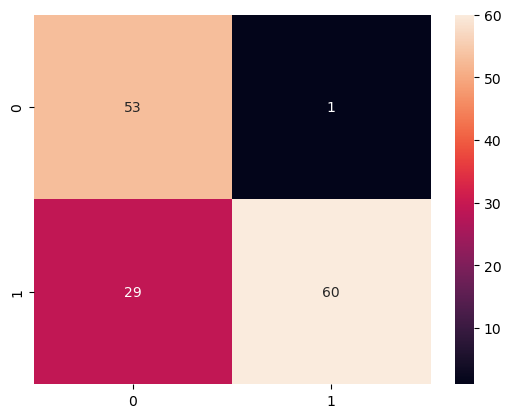

In [35]:
sns.heatmap(cm,annot=True, fmt="d")

In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.65      0.98      0.78        54
         1.0       0.98      0.67      0.80        89

    accuracy                           0.79       143
   macro avg       0.81      0.83      0.79       143
weighted avg       0.86      0.79      0.79       143



2813/2813 [==============================] - 4s 1ms/step


C:\Users\Amit Gali\AppData\Local\Temp\ipykernel_15052\3551067636.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


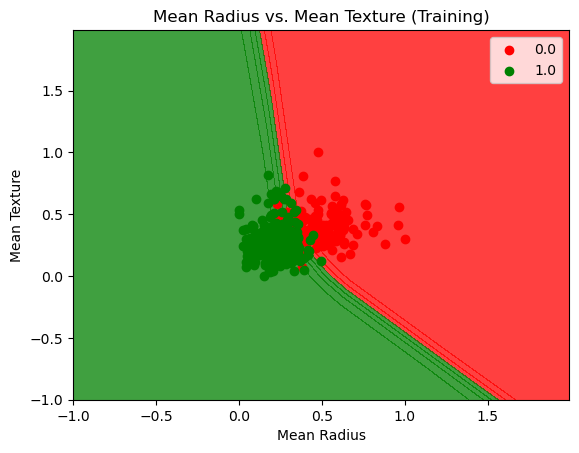

In [37]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [39]:
weights, baises = model.layers[0].get_weights()

In [40]:
weights

array([[ 0.68983144, -0.3491922 , -0.44704357, -0.1723595 , -0.43992075,
         0.61877465,  0.6027063 ,  0.5637777 ,  0.7969928 ,  0.4403614 ,
         0.57879925, -0.5810819 ,  0.8075264 ,  0.3294618 , -0.32906806,
        -0.0765982 , -0.16859975,  0.5851507 ,  0.40148926, -0.4527817 ],
       [-0.07331787,  0.03952891, -0.48272902, -0.27861983,  0.2827741 ,
         0.02262275,  0.11783125,  0.3504589 ,  0.4142774 , -0.03192686,
         0.6642594 ,  0.46956855,  0.22502834,  0.36911952, -0.11875805,
        -0.22965565,  0.04169919,  0.03383376, -1.042164  ,  0.15131497]],
      dtype=float32)

In [41]:
baises

array([-0.03032628, -0.02173931,  0.        ,  0.        ,  0.2528537 ,
       -0.06190202, -0.09127076,  0.54589474, -0.11193815, -0.02385614,
       -0.06605411,  0.27891377, -0.14924452, -0.10011544,  0.        ,
        0.        ,  0.32184982, -0.06096951,  0.28180134,  0.30993438],
      dtype=float32)

2813/2813 [==============================] - 5s 2ms/step


C:\Users\Amit Gali\AppData\Local\Temp\ipykernel_15052\1643330128.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


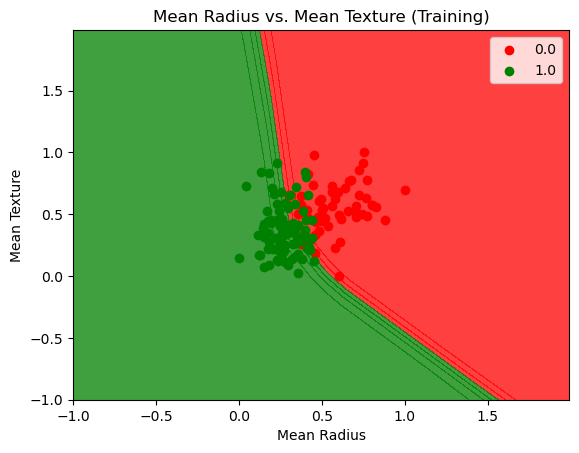

In [42]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()